In [1]:
%matplotlib inline

import numpy as np
import math
import cv2
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
def print_img(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

In [97]:
pip install opencv-contrib-python

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# 1 Задание 
Выбрать три разных изображения, хотя бы на одном из которых присутствуют объекты с легко визуально выделяемыми краями. Применить к изображениям детектор Харриса, Ши-Томаси.

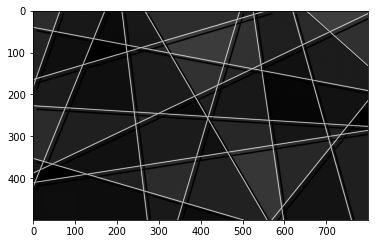

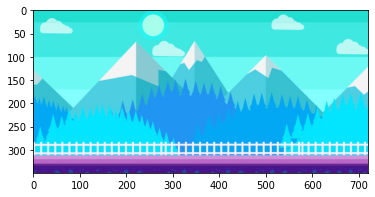

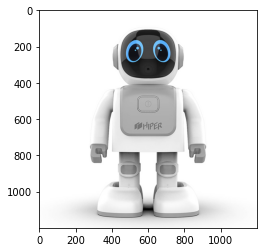

In [4]:
img =  cv2.imread('lines.jpg')
print_img(img)
img1 = cv2.imread('hills.jpg')
print_img(img1)
img2 = cv2.imread('robot.jpg')
print_img(img2);

In [5]:
def harris(img1):
    img = img1.copy()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray,2,3,0.04)
    #result is dilated for marking the corners, not important
    dst = cv2.dilate(dst,None)
    # Threshold for an optimal value, it may vary depending on the image.
    img[dst>0.001*dst.max()]=[0,0,255]
    print_img(img)

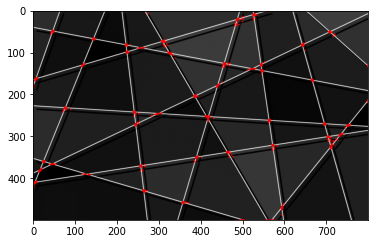

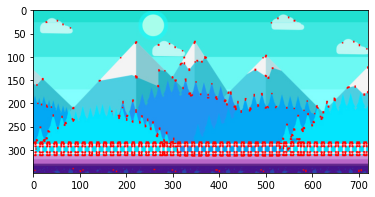

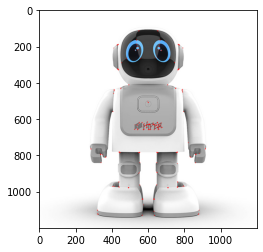

In [6]:
harris(img)
harris(img1)
harris(img2)

In [7]:
def shi_tomas(img1):
    img = img1.copy()
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    corners = cv2.goodFeaturesToTrack(gray,170,0.01,0)
    corners = np.int0(corners)
    for i in corners:
        x,y = i.ravel()
        cv2.circle(img,(x,y),3,(0, 0, 255),4)
    print_img(img)

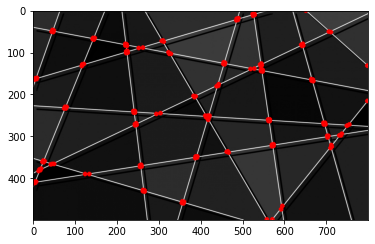

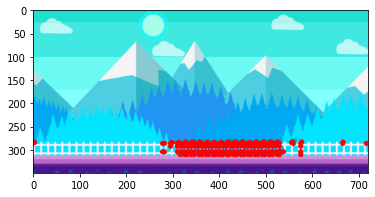

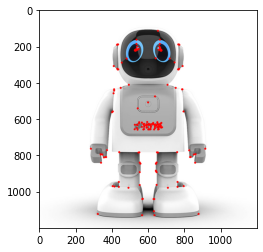

In [8]:
shi_tomas(img)
shi_tomas(img1)
shi_tomas(img2)

# Задание 2
Выбрать изображение, содержащее не менее 3-х одинаковых объектов. Составить изображение (шаблон) из точек, соответствующих положению объекта на изображении. 

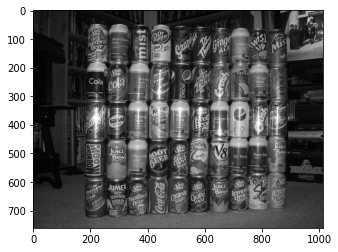

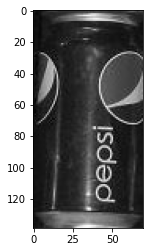

In [9]:
img =  cv2.imread('cans.jpg',0)
print_img(img)
img1 = cv2.imread('pepsi.jpg',0)
print_img(img1)

# Задание 3
Для изображения и шаблона из пункта 2 (или других изображений с соответствующими характеристиками), с помощью SIFT: 

# Задание 3.1
Нарисовать ключевые точки на изображении и шаблоне. Вывести координаты, ориентацию особых точек.

In [10]:
sift = cv2.SIFT_create() 
kp1, des1 = sift.detectAndCompute(img,None)
kp2, des2 = sift.detectAndCompute(img1,None)

In [11]:
for  p in kp1:
    print(p.pt,p.angle)

(3.8406426906585693, 444.9403991699219) 181.34864807128906
(7.4596781730651855, 442.76873779296875) 177.6482391357422
(7.847561359405518, 435.54534912109375) 178.00161743164062
(8.814104080200195, 421.0686950683594) 96.95304870605469
(9.205248832702637, 423.7618408203125) 89.82942199707031
(10.98336124420166, 437.1424865722656) 351.10723876953125
(11.508275985717773, 397.10565185546875) 126.11680603027344
(12.049300193786621, 427.8973693847656) 92.86767578125
(12.39572525024414, 402.9461669921875) 184.84144592285156
(12.39572525024414, 402.9461669921875) 350.1827697753906
(12.941649436950684, 725.011962890625) 67.63693237304688
(12.95798110961914, 441.3135986328125) 182.76504516601562
(12.95798110961914, 441.3135986328125) 248.8053436279297
(13.284551620483398, 416.449951171875) 181.41659545898438
(13.28482437133789, 422.2000732421875) 50.69541931152344
(13.28482437133789, 422.2000732421875) 174.6438751220703
(14.022880554199219, 444.7915344238281) 163.46820068359375
(14.02288055419921

(331.1148986816406, 327.3646240234375) 29.272308349609375
(331.1176452636719, 638.6047973632812) 13.354454040527344
(331.2930908203125, 352.4525146484375) 330.3147277832031
(331.41632080078125, 239.4115447998047) 185.02908325195312
(331.4367370605469, 74.21755981445312) 189.776123046875
(331.4718322753906, 82.33563995361328) 0.9643936157226562
(331.6484680175781, 314.3381652832031) 26.71600341796875
(331.7796936035156, 413.27301025390625) 358.6546325683594
(332.021240234375, 345.45196533203125) 359.36328125
(332.0553894042969, 270.1053466796875) 182.80841064453125
(332.45001220703125, 375.78125) 343.53009033203125
(333.64849853515625, 444.5252990722656) 8.416519165039062
(333.9475402832031, 249.00086975097656) 186.8898162841797
(334.42364501953125, 72.3266830444336) 157.433349609375
(334.5233459472656, 80.57633209228516) 1.9133377075195312
(334.5233459472656, 80.57633209228516) 161.48377990722656
(334.7418518066406, 84.62272644042969) 170.61697387695312
(334.7418518066406, 84.622726440

(512.8181762695312, 410.1792297363281) 224.0357666015625
(512.8181762695312, 410.1792297363281) 299.1521301269531
(512.8197021484375, 423.9288024902344) 178.2461700439453
(512.8540649414062, 403.6261291503906) 161.38031005859375
(512.8850708007812, 433.20269775390625) 178.18223571777344
(513.0578002929688, 117.1716079711914) 29.579505920410156
(513.094970703125, 161.13037109375) 12.232894897460938
(513.1431884765625, 392.9431457519531) 6.725273132324219
(513.1431884765625, 392.9431457519531) 174.630126953125
(513.1544189453125, 383.1383056640625) 353.5762939453125
(513.2211303710938, 426.6575622558594) 201.18360900878906
(513.490478515625, 398.426513671875) 165.9673309326172
(513.490478515625, 398.426513671875) 203.8026885986328
(513.5018920898438, 368.5616760253906) 190.7633056640625
(513.5018920898438, 368.5616760253906) 347.3310241699219
(513.9945068359375, 656.0005493164062) 235.76844787597656
(514.1087036132812, 536.3596801757812) 238.76242065429688
(514.1087036132812, 536.3596801

(697.6815185546875, 606.0728759765625) 59.26124572753906
(697.6815185546875, 606.0728759765625) 218.32005310058594
(697.90087890625, 228.5699920654297) 148.82046508789062
(698.0718994140625, 555.77392578125) 332.3580322265625
(698.1693725585938, 619.9957275390625) 353.6181640625
(698.3048095703125, 647.3722534179688) 352.3214416503906
(698.6566772460938, 296.5555725097656) 5.314979553222656
(698.7700805664062, 278.32196044921875) 4.206352233886719
(698.8265380859375, 289.359375) 358.9906311035156
(698.9564819335938, 258.0140686035156) 182.35984802246094
(699.1064453125, 67.14867401123047) 46.45111083984375
(699.595703125, 313.09967041015625) 291.88116455078125
(699.8203735351562, 41.37019729614258) 191.47055053710938
(700.024169921875, 438.1542663574219) 300.8247985839844
(700.046630859375, 249.17868041992188) 173.40501403808594
(700.046630859375, 249.17868041992188) 337.1393127441406
(700.0785522460938, 610.4099731445312) 0.26947021484375
(700.1187744140625, 308.2385559082031) 294.188

(968.1300659179688, 42.609466552734375) 16.54705047607422
(968.1300659179688, 42.609466552734375) 217.0597686767578
(969.0254516601562, 23.058612823486328) 61.59149169921875
(970.3846435546875, 16.594236373901367) 239.9856414794922
(970.3846435546875, 16.594236373901367) 283.5040588378906
(970.7430419921875, 104.6578140258789) 198.1548309326172
(970.7430419921875, 104.6578140258789) 351.8446044921875
(971.1005249023438, 34.578861236572266) 199.57337951660156
(971.341552734375, 539.576904296875) 125.64224243164062
(971.4212036132812, 47.17818069458008) 267.131591796875
(971.914306640625, 80.09400939941406) 180.69541931152344
(971.9375610351562, 62.6129150390625) 162.97621154785156
(971.9375610351562, 62.6129150390625) 301.1623840332031
(971.958251953125, 561.8878173828125) 359.0893859863281
(972.2997436523438, 75.91839599609375) 180.74130249023438
(972.5608520507812, 25.291500091552734) 68.18523406982422
(973.4396362304688, 8.816486358642578) 259.72265625
(973.8048706054688, 72.02491760

In [12]:
for  p in kp2:
    print(p.pt,p.angle)

(10.859917640686035, 39.9137077331543) 14.53643798828125
(10.860855102539062, 39.37636184692383) 11.810455322265625
(15.547446250915527, 84.33578491210938) 178.44544982910156
(15.909184455871582, 73.0318832397461) 10.020332336425781
(15.909184455871582, 73.0318832397461) 182.9397430419922
(16.304759979248047, 69.06574249267578) 178.9357147216797
(17.938793182373047, 131.84445190429688) 86.03565216064453
(23.856632232666016, 122.14883422851562) 66.96006774902344
(30.524585723876953, 130.67337036132812) 82.17422485351562
(31.647035598754883, 123.86508178710938) 10.973320007324219
(31.91166877746582, 114.63101959228516) 7.400779724121094
(34.92942810058594, 117.04589080810547) 6.273460388183594
(34.92942810058594, 117.04589080810547) 171.5147705078125
(34.952110290527344, 36.48723220825195) 355.82965087890625
(35.00875473022461, 101.29644775390625) 6.341590881347656
(35.622520446777344, 92.14918518066406) 6.7530059814453125
(35.81338119506836, 31.39133071899414) 5.103874206542969
(36.0842

# Задание 3.2
Используя bf = cv2.BFMatcher(), bf.knnMatch() и выбрав наиболее подходящий коэффициент для .distance (см. презентацию лекции) получить пары соответствующих особых точек, отобразить результаты cv2.drawMatchesKnn при сравнении шаблона и изображения. При этом по очереди использовать каждое допустимое значение параметра flags.

enum  	cv::DrawMatchesFlags {
  cv::DrawMatchesFlags::DEFAULT = 0,
  cv::DrawMatchesFlags::DRAW_OVER_OUTIMG = 1,
  cv::DrawMatchesFlags::NOT_DRAW_SINGLE_POINTS = 2,
  cv::DrawMatchesFlags::DRAW_RICH_KEYPOINTS = 4
}

DEFAULT = 0 – Создается матрица выходного изображения. Будут нарисованы: оба
сравниваемых изображения, matches (совпадения), single keypoints. Каждая ключевая точка
будет нарисован без окружности вокруг, но с keypoint size и orientation.

DRAW_OVER_OUTIMG = 1 – Не создается матрица выходного изображения. Совпадения
будут нарисованы на имеющемся выходном изображении.

NOT_DRAW_SINGLE_POINTS = 2 – Single keypoints will not be drawn.

DRAW_RICH_KEYPOINTS = 4 – Каждая ключевая точки будет нарисована в соответствии
с keypoint size, также будут нарисованы ее ориентация, окружность вокруг.

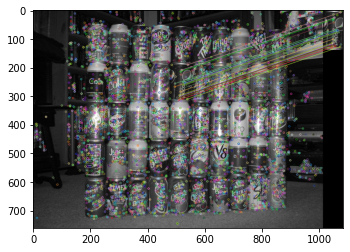

In [13]:
bf = cv2.BFMatcher() # BFMatcher with default params
matches = bf.knnMatch(des1,des2, k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.5*n.distance:
        good.append([m])
# cv2.drawMatchesKnn expects list of lists as matches.

img3 = cv2.drawMatchesKnn(img,kp1,img1,kp2, matches1to2=good,outImg=None, flags=0)
print_img(img3)

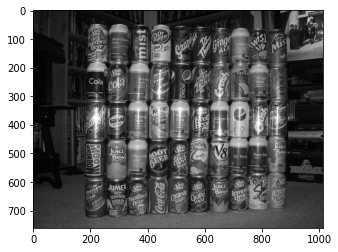

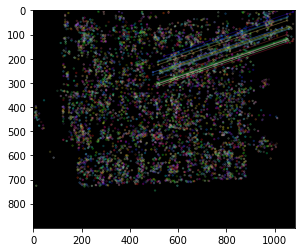

In [14]:
bf = cv2.BFMatcher() # BFMatcher with default params
matches = bf.knnMatch(des1,des2, k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.3*n.distance:
        good.append([m])
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = img.copy()
print_img(img3)
x,y =  img1.shape
xx,yy = img.shape
img3 = np.zeros((x+xx,y+yy,3), np.uint8)

#print_img(img3)
img3 = cv2.drawMatchesKnn(img,kp1,img1,kp2, matches1to2=good,outImg=img3, flags=1)
print_img(img3)

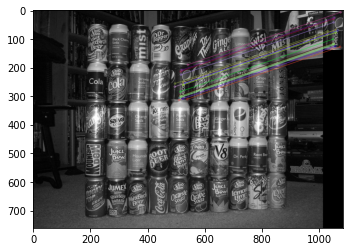

In [15]:
bf = cv2.BFMatcher() # BFMatcher with default params
matches = bf.knnMatch(des1,des2, k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.3*n.distance:
        good.append([m])
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img,kp1,img1,kp2, matches1to2=good,outImg=None, flags=2)
print_img(img3)

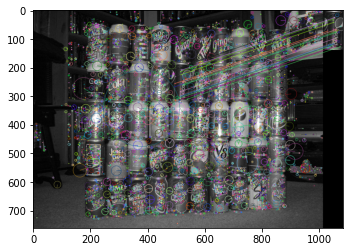

In [16]:
bf = cv2.BFMatcher() # BFMatcher with default params
matches = bf.knnMatch(des1,des2, k=2)
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.3*n.distance:
        good.append([m])
# cv2.drawMatchesKnn expects list of lists as matches.
img3 = cv2.drawMatchesKnn(img,kp1,img1,kp2, matches1to2=good,outImg=None, flags=4)
print_img(img3)

# Задание 3.3
Используя FLANN  получить соответствия особых точек шаблона и изображения. Вывести координаты и отобразить на шаблоне и изображении первые три особые точки, которые соответствуют друг друга на шаблоне и изображении. 

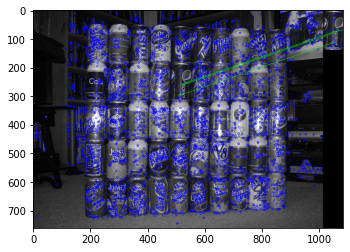

3
[(31.91166877746582, 114.63101959228516), (44.25553512573242, 78.02051544189453), (50.91080093383789, 71.31997680664062)]
[(511.88494873046875, 297.4760437011719), (524.2742919921875, 260.9994201660156), (530.9495849609375, 254.3556671142578)]


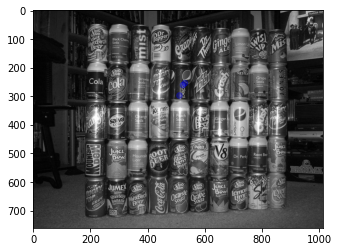

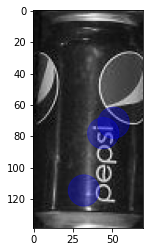

In [48]:
import cv2
from matplotlib import pyplot as plt
source_img = img
template_img = img1
# Initiate SIFT detector
sift = cv2.SIFT_create() # Initiate SIFT detector
# find the keypoints and descriptors with SIFT
skp, sdes = sift.detectAndCompute(source_img, None)
tkp, tdes = sift.detectAndCompute(template_img, None)
# Get matches
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50) # or pass empty dictionary
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(sdes, tdes, k=2)
# Need to draw only good matches, so create a mask
matchesMask = [[0,0] for i in range(len(matches))]
keypoint_arr = []
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.04 * n.distance:
      #  print('m= ',m.distance, m.imgIdx, m.queryIdx, m.trainIdx, 'n= ',n.distance, n.imgIdx, n.queryIdx, n.trainIdx)
        keypoint_arr.append((m.distance, m.trainIdx, m.queryIdx))
        matchesMask[i]=[1,0]
#print(f'matchesMask={matchesMask}')
draw_params = dict(matchColor = (0,255,0),
singlePointColor = (255,0,0),
matchesMask = matchesMask,flags = 0)
img3 = cv2.drawMatchesKnn(source_img,skp,template_img,tkp,matches,None,**draw_params)
print_img(img3)
spts = [p.pt for p in skp]
tpts = [p.pt for p in tkp]
tcoord = []
scoord = []
for _, i,j in keypoint_arr:
    tcoord.append(tpts[i])
    scoord.append(spts[j])
print(len(keypoint_arr))
print(tcoord)
print(scoord)
fig = plt.figure()
a_source = fig.add_subplot(1, 1, 1)
for i in scoord:
    circ = plt.Circle((i[0], i[1]), 10., color = 'b', alpha=0.3)
    a_source.add_patch(circ)
plt.imshow(cv2.cvtColor(source_img, cv2.COLOR_BGR2RGB))
fig2 = plt.figure()
a_template = fig2.add_subplot(1, 1, 1)
for i in tcoord:
    circ = plt.Circle((i[0], i[1]), 10., color = 'b', alpha=0.3)
    a_template.add_patch(circ)
plt.imshow(cv2.cvtColor(template_img, cv2.COLOR_BGR2RGB))
plt.show()

# Задание 3.4
4) Над изображением выполнить преобразования:
    a) повернуть на 90 град, 
    b) повернуть на 210 град,
    c) растянуть (масштабирование) в 2 раза,
    d) выполнить масштабирование с коэффициентом 0,5,
    e) повернуть на 270 град, растянуть в 1,5 раза.
Для шаблона и каждого из полученных изображений, используя FLANN и cv2.drawMatchesKnn, отобразить соответствия особых точек.

In [49]:
def print_points(img,img1,par):
    source_img = img
    template_img = img1
    # Initiate SIFT detector
    sift = cv2.SIFT_create() # Initiate SIFT detector
    # find the keypoints and descriptors with SIFT
    skp, sdes = sift.detectAndCompute(source_img, None)
    tkp, tdes = sift.detectAndCompute(template_img, None)
    # Get matches
    FLANN_INDEX_KDTREE = 0
    index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
    search_params = dict(checks=50) # or pass empty dictionary
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(sdes, tdes, k=2)
    # Need to draw only good matches, so create a mask
    matchesMask = [[0,0] for i in range(len(matches))]
    keypoint_arr = []
    # ratio test as per Lowe's paper
    for i,(m,n) in enumerate(matches):
        if m.distance < par * n.distance:
          #  print('m= ',m.distance, m.imgIdx, m.queryIdx, m.trainIdx, 'n= ',n.distance, n.imgIdx, n.queryIdx, n.trainIdx)
            keypoint_arr.append((m.distance, m.trainIdx, m.queryIdx))
            matchesMask[i]=[1,0]
    #print(f'matchesMask={matchesMask}')
    draw_params = dict(matchColor = (0,255,0),
    singlePointColor = (255,0,0),
    matchesMask = matchesMask,flags = 0)
    img3 = cv2.drawMatchesKnn(source_img,skp,template_img,tkp,matches,None,**draw_params)
    print_img(img3)

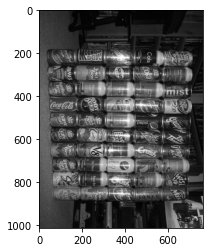

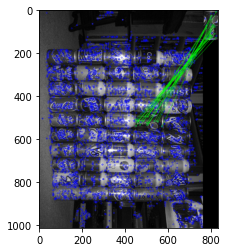

In [118]:
#a) повернуть на 90 град,
img3 = cv2.rotate (img, cv2.ROTATE_90_CLOCKWISE)
print_img(img3)
print_points(img3,img1, 0.5)

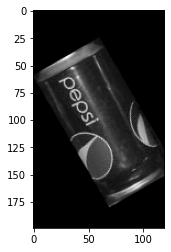

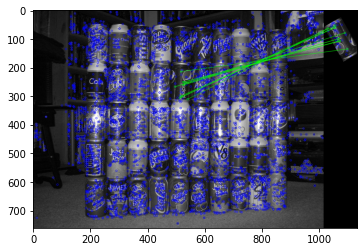

In [76]:
# b) повернуть на 210 град,
(h, w) = img1.shape[:2]
center = (w / 2+10, h / 2+20)
M = cv2.getRotationMatrix2D(center, 210, 1.0)
#M = np.float32([[math.cos(phi), -math.sin(phi),0],[math.sin(phi),math.cos(phi),0]])
img3 = cv2.warpAffine(img1, M, (w+50, h+60))
print_img(img3)
print_points(img,img3, 0.5)

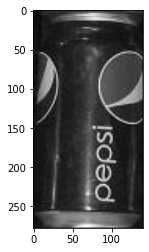

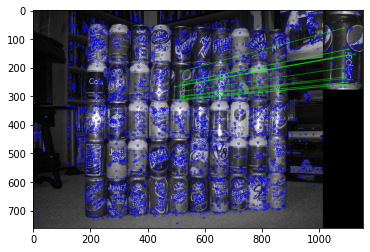

In [82]:
#c) растянуть (масштабирование) в 2 раза,
(h, w) = img1.shape[:2]
center = (0 , 0 )
M = cv2.getRotationMatrix2D(center, 0, 2.0)
#M = np.float32([[math.cos(phi), -math.sin(phi),0],[math.sin(phi),math.cos(phi),0]])
img3 = cv2.warpAffine(img1, M, (2*w, 2*h))
print_img(img3)
print_points(img,img3, 0.5)

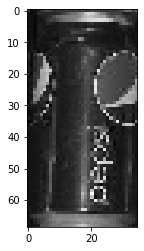

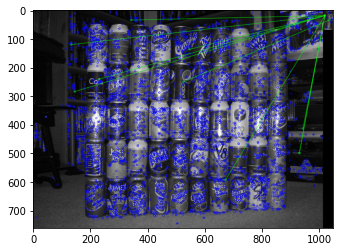

In [86]:
# d) выполнить масштабирование с коэффициентом 0,5,
(h, w) = img1.shape[:2]
center = (0 , 0 )
M = cv2.getRotationMatrix2D(center, 0, 0.5)
#M = np.float32([[math.cos(phi), -math.sin(phi),0],[math.sin(phi),math.cos(phi),0]])
img3 = cv2.warpAffine(img1, M, (w//2, h//2))
print_img(img3)
print_points(img,img3, 0.6)

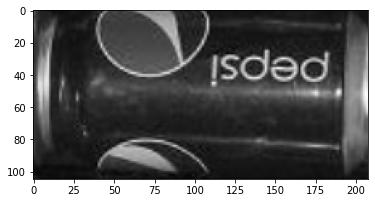

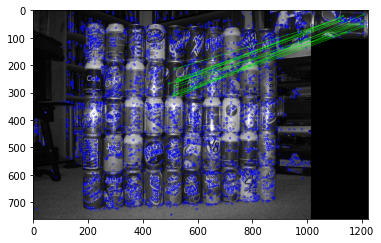

In [90]:
# e) повернуть на 270 град, растянуть в 1,5 раза.
img3 = cv2.rotate (img1, cv2.ROTATE_90_COUNTERCLOCKWISE)
(h, w) = img1.shape[:2]
center = (0, 0)
M = cv2.getRotationMatrix2D(center, 0, 1.5)
#M = np.float32([[math.cos(phi), -math.sin(phi),0],[math.sin(phi),math.cos(phi),0]])
img3 = cv2.warpAffine(img3, M, (3*h//2, 3*w//2))
print_img(img3)
print_points(img,img3, 0.5)

# Задание 4
Выполнить действия из пункта 3.4), использую вместо SIFT детекторы SURF, ORB

In [108]:
def print_points1(img1,img2,par):
    # Initiate SURF detector
    orb = cv2.ORB_create()
    kp1, des1 = orb.detectAndCompute(img1,None)
    kp2, des2 = orb.detectAndCompute(img2,None)
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1,des2, k=2)
    # Apply ratio test
    good = []
    for m,n in matches:
        if m.distance < par*n.distance:
            good.append([m])
    img3 = cv2.drawMatchesKnn(img1,kp1,img2,kp2, matches1to2=good,
    outImg=None, flags=2)
    print_img(img3)

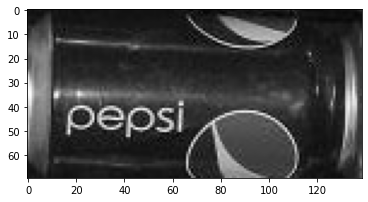

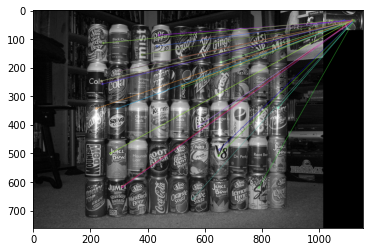

In [111]:
img3 = cv2.rotate (img1, cv2.ROTATE_90_CLOCKWISE)
print_img(img3)
print_points1(img,img3, 0.78)

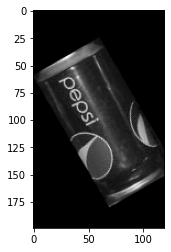

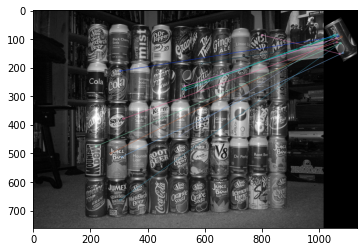

In [113]:
# b) повернуть на 210 град,
(h, w) = img1.shape[:2]
center = (w / 2+10, h / 2+20)
M = cv2.getRotationMatrix2D(center, 210, 1.0)
#M = np.float32([[math.cos(phi), -math.sin(phi),0],[math.sin(phi),math.cos(phi),0]])
img3 = cv2.warpAffine(img1, M, (w+50, h+60))
print_img(img3)
print_points1(img,img3, 0.78)

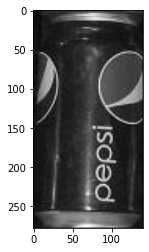

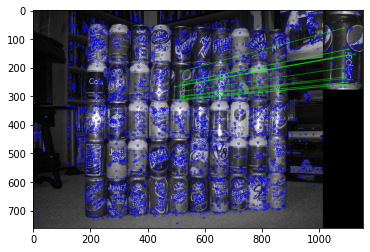

In [115]:
#c) растянуть (масштабирование) в 2 раза,
(h, w) = img1.shape[:2]
center = (0 , 0 )
M = cv2.getRotationMatrix2D(center, 0, 2.0)
#M = np.float32([[math.cos(phi), -math.sin(phi),0],[math.sin(phi),math.cos(phi),0]])
img3 = cv2.warpAffine(img1, M, (2*w, 2*h))
print_img(img3)
print_points(img,img3, 0.5)

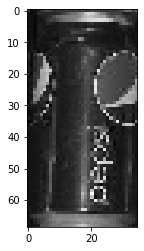

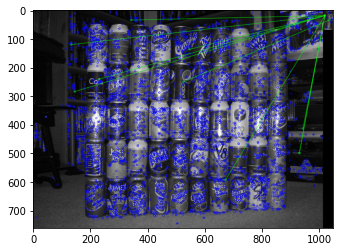

In [116]:
# d) выполнить масштабирование с коэффициентом 0,5,
(h, w) = img1.shape[:2]
center = (0 , 0 )
M = cv2.getRotationMatrix2D(center, 0, 0.5)
#M = np.float32([[math.cos(phi), -math.sin(phi),0],[math.sin(phi),math.cos(phi),0]])
img3 = cv2.warpAffine(img1, M, (w//2, h//2))
print_img(img3)
print_points(img,img3, 0.6)

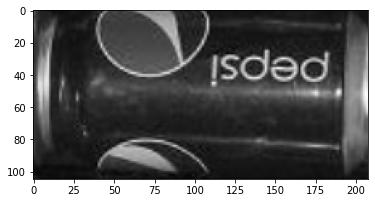

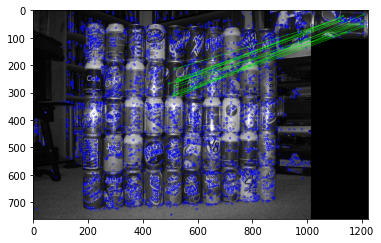

In [117]:
# e) повернуть на 270 град, растянуть в 1,5 раза.
img3 = cv2.rotate (img1, cv2.ROTATE_90_COUNTERCLOCKWISE)
(h, w) = img1.shape[:2]
center = (0, 0)
M = cv2.getRotationMatrix2D(center, 0, 1.5)
#M = np.float32([[math.cos(phi), -math.sin(phi),0],[math.sin(phi),math.cos(phi),0]])
img3 = cv2.warpAffine(img3, M, (3*h//2, 3*w//2))
print_img(img3)
print_points(img,img3, 0.5)